In [3]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
random_state=0

In [4]:
df= pd.read_csv('iris.csv')
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
def assign_cat_codes(df, col_name):
    col_index = df.columns.get_loc(col_name)
    df[col_name] = df[col_name].astype('category')
    df.insert(col_index + 1, f'{col_name}_cat', df[col_name].cat.codes)
    df.drop(columns=[col_name], inplace=True)
    
columns_to_convert = ['Species']

for col in columns_to_convert:
    assign_cat_codes(df, col)
    

In [6]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species_cat
0            5.1           3.5            1.4           0.2            0
1            4.9           3.0            1.4           0.2            0
2            4.7           3.2            1.3           0.2            0
3            4.6           3.1            1.5           0.2            0
4            5.0           3.6            1.4           0.2            0

In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_cat'],
      dtype='object')

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Me

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Sp

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0,

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view


Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: S

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1,

<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Me

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, 

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, M

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, M

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, M

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, 

<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s


Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Sp

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: S

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, 

<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: S

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Sp

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, 

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view


Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1,

<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


<ipython-input-11-ca88997e127c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


<ipython-input-11-ca88997e127c>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-11-ca88997e127c>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-11-ca88997e127c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

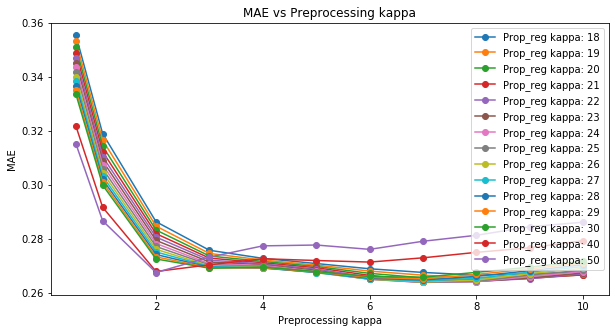

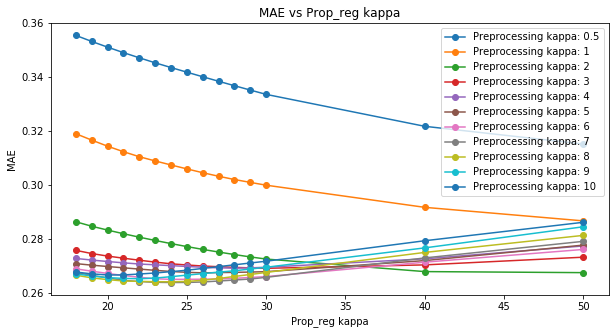

Optimal Preprocessing kappa: 7
Optimal Prop_reg kappa: 24
Minimum MAE: 0.26393827913276136


In [11]:
def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d = abs(X_test_col_val - X_train_col_np[j])
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)


def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa



import matplotlib.pyplot as plt

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

ordinal_columns = ['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
kappa_values_preprocessing = [0.5, 1, 2,3,4,5,6,7,8,9,10]
kappa_values_prop_reg = [18,19,20,21,22,23,24,25,26,27,28,29,30,40,50]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)



# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()

# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Prop_reg kappa')
plt.ylabel('MAE')
plt.title('MAE vs Prop_reg kappa')
plt.legend()
plt.show()


    # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")

In [12]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print(f"Preprocessing kappa: {kappa_preprocessing}, Prop_reg kappa: {kappa_prop_reg}, MAE: {mae}")
    

Kappa combinations and their MAE values:
Preprocessing kappa: 0.5, Prop_reg kappa: 18, MAE: 0.355503522693955
Preprocessing kappa: 0.5, Prop_reg kappa: 19, MAE: 0.3532773829372925
Preprocessing kappa: 0.5, Prop_reg kappa: 20, MAE: 0.35115741365814473
Preprocessing kappa: 0.5, Prop_reg kappa: 21, MAE: 0.3491306514784734
Preprocessing kappa: 0.5, Prop_reg kappa: 22, MAE: 0.3472129588342205
Preprocessing kappa: 0.5, Prop_reg kappa: 23, MAE: 0.34535529396671505
Preprocessing kappa: 0.5, Prop_reg kappa: 24, MAE: 0.34360887673555357
Preprocessing kappa: 0.5, Prop_reg kappa: 25, MAE: 0.341887781645754
Preprocessing kappa: 0.5, Prop_reg kappa: 26, MAE: 0.34019210838569597
Preprocessing kappa: 0.5, Prop_reg kappa: 27, MAE: 0.33852192916445095
Preprocessing kappa: 0.5, Prop_reg kappa: 28, MAE: 0.33687728446143933
Preprocessing kappa: 0.5, Prop_reg kappa: 29, MAE: 0.33525818103883415
Preprocessing kappa: 0.5, Prop_reg kappa: 30, MAE: 0.33366459152515227
Preprocessing kappa: 0.5, Prop_reg kappa: 4

In [13]:
X

SepalWidthCm  PetalLengthCm  PetalWidthCm  Species_cat
0             3.5            1.4           0.2            0
1             3.0            1.4           0.2            0
2             3.2            1.3           0.2            0
3             3.1            1.5           0.2            0
4             3.6            1.4           0.2            0
..            ...            ...           ...          ...
145           3.0            5.2           2.3            2
146           2.5            5.0           1.9            2
147           3.0            5.2           2.0            2
148           3.4            5.4           2.3            2
149           3.0            5.1           1.8            2

[150 rows x 4 columns]

In [14]:
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [8]:
X = df.drop('SepalLengthCm', axis=1)  # Drop the 'Weight' column from the input features
y = df['SepalLengthCm']  # Set 'Weight' as the target variable

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

# Random Forest
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_rf) * -1)

# Decision Tree
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_dt) * -1)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_knn) * -1)
import xgboost as xgb
# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_xgb) * -1)


0.35589999999999933
0.41333333333333355
0.3480000000000002
0.4157982222239177


In [9]:
df.shape

(150, 5)